## Country in Need Analysis

child_mort : Death of children under 5 years of age per 1000 live births

exports : Exports of goods and services per capita. Given as %age of the GDP per capita

health : Total health spending per capita. Given as %age of GDP per capita

imports : Imports of goods and services per capita. Given as %age of the GDP per capita

Income : Net income per person

Inflation : The measurement of the annual growth rate of the Total GDP

life_expec : The average number of years a new born child would live

total_fer : The number of children that would be born to each woman

gdpp : The GDP per capita

In [1309]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [1310]:
# loading data
data = pd.read_csv("country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Check data

In [1311]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [1313]:
col = list(data.columns)
col.remove("country")

### Data Visualisation and Exploratory Data Analysis

Distribution

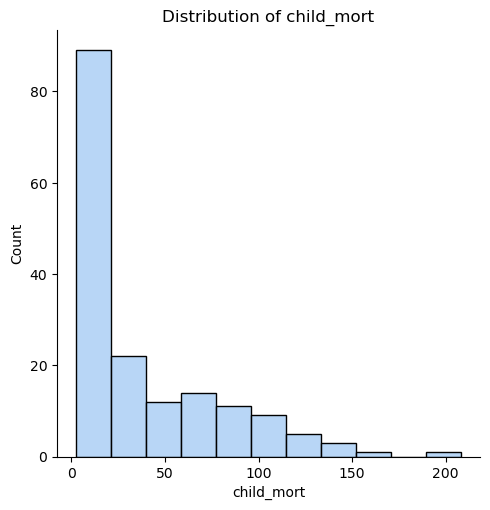

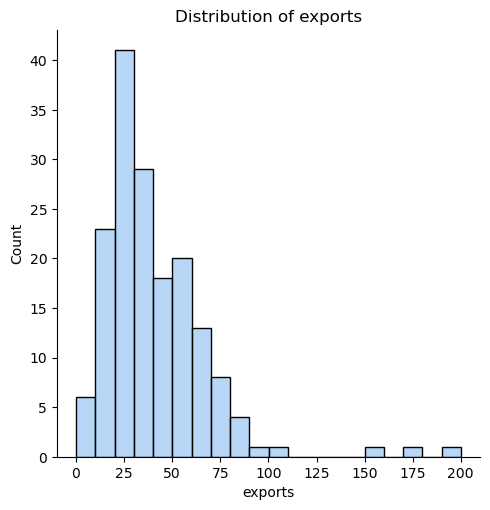

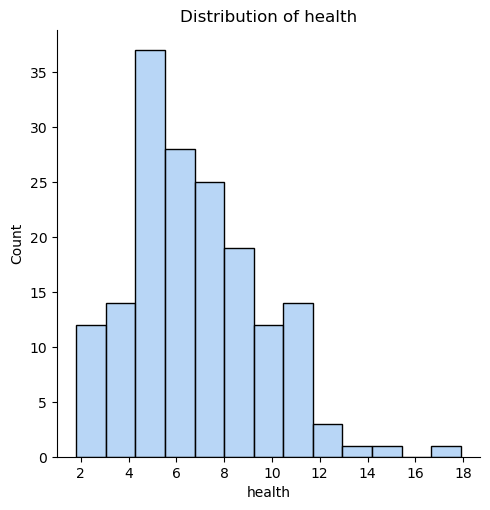

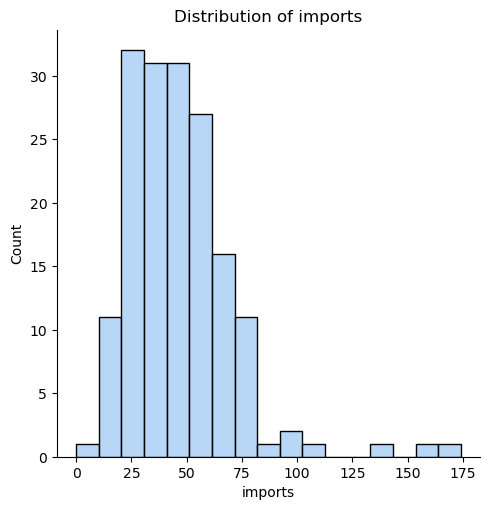

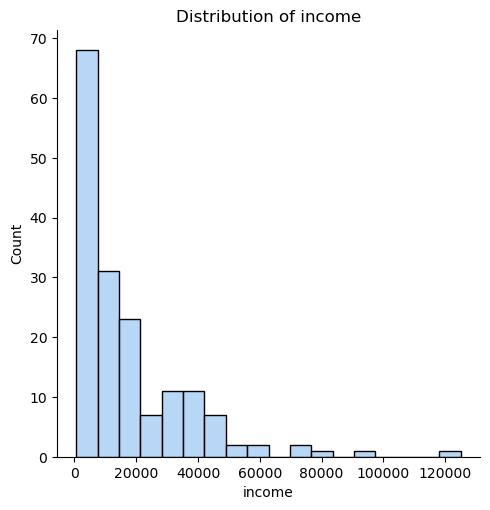

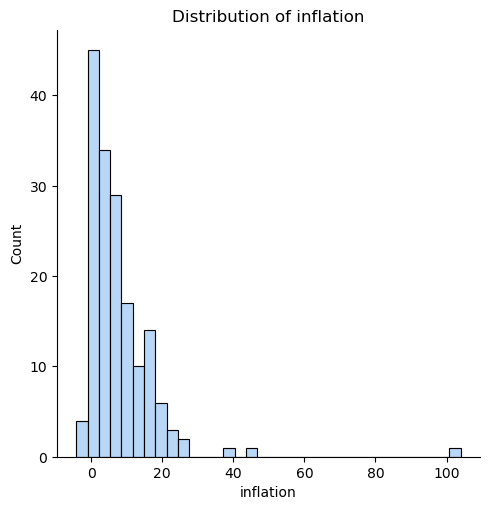

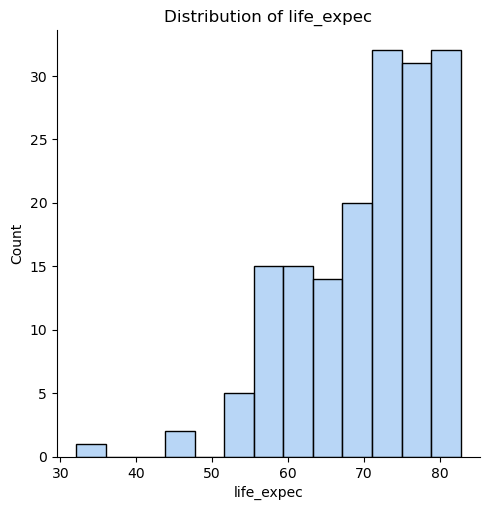

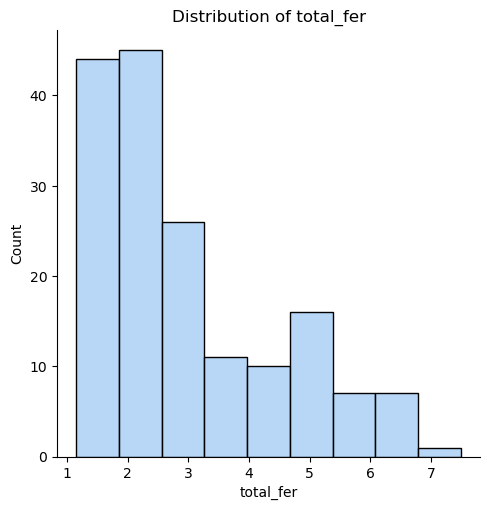

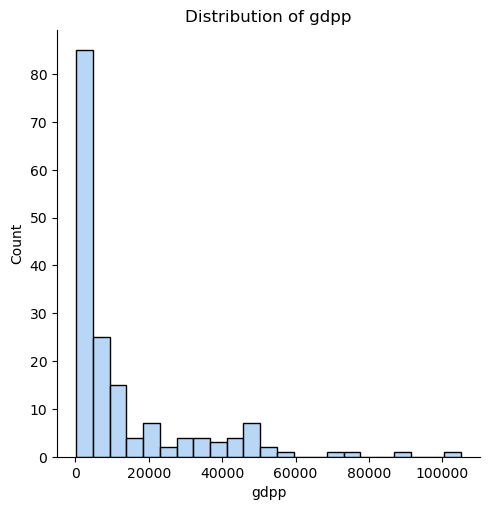

In [1314]:
sns.set_palette("pastel")
# fig = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i in range(len(col)):
    sns.displot(data = data[col[i]])
    plt.title("Distribution of " + col[i])
   
plt.show()

#### Highest 5 and Lowest 5

Child Mortality : Death of children under 5 years of age per 1000 live births

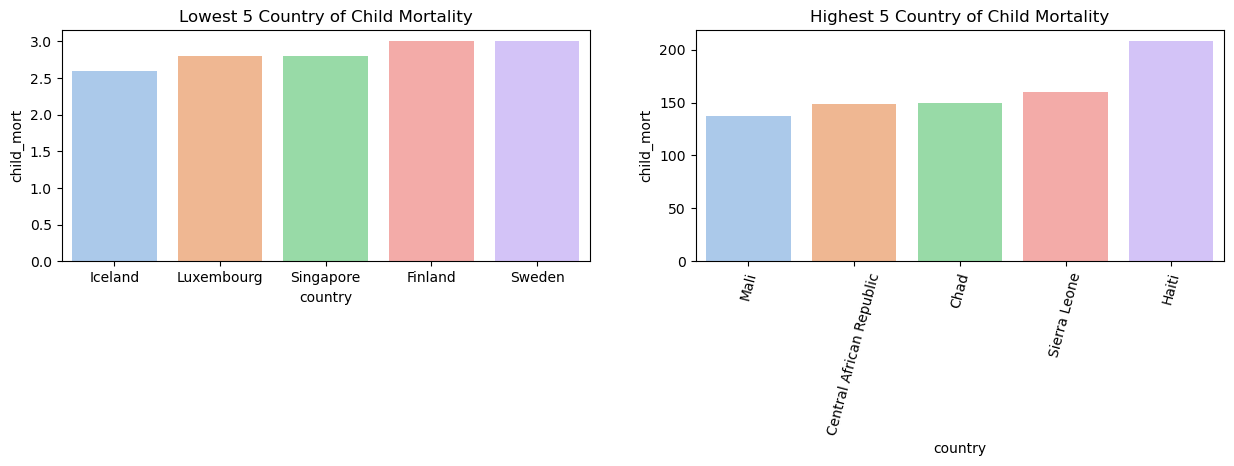

In [1315]:
sorted = data.sort_values(by = "child_mort")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
lowest = sns.barplot(ax = ax[0,0], x = "country", y = "child_mort", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Child Mortality")
sns.barplot(ax = ax[0,1], x = "country", y = "child_mort", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Child Mortality")
plt.xticks(rotation = 75)

plt.show()

Exports : Exports of goods and services per capita. Given as % of the GDP per capita

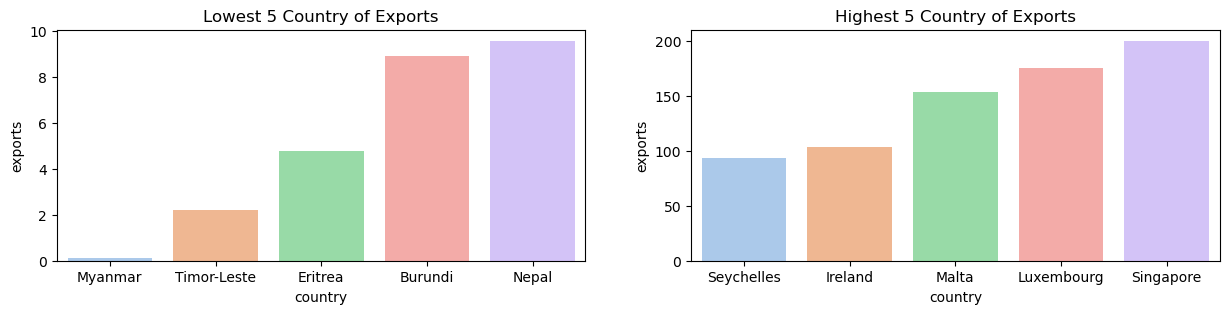

In [1316]:
sorted = data.sort_values(by = "exports")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
lowest = sns.barplot(ax = ax[0,0], x = "country", y = "exports", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Exports")
sns.barplot(ax = ax[0,1], x = "country", y = "exports", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Exports")
# plt.xticks(rotation = 75)

plt.show()

Health : Total health spending per capita. Given as % of GDP per capita

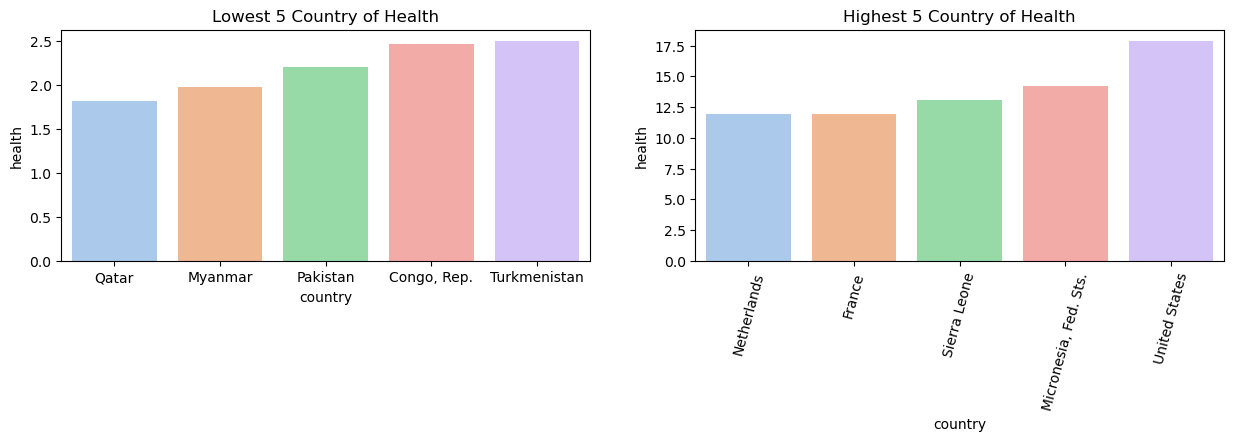

In [1317]:
sorted = data.sort_values(by = "health")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
lowest = sns.barplot(ax = ax[0,0], x = "country", y = "health", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Health")
sns.barplot(ax = ax[0,1], x = "country", y = "health", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Health")
plt.xticks(rotation = 75)

plt.show()

Imports : Imports of goods and services per capita. Given as % of the GDP per capita

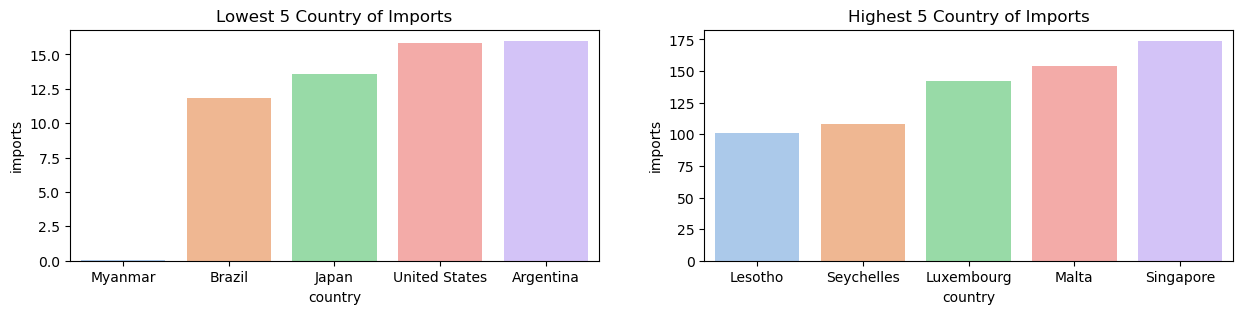

In [1318]:
sorted = data.sort_values(by = "imports")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
lowest = sns.barplot(ax = ax[0,0], x = "country", y = "imports", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Imports")
sns.barplot(ax = ax[0,1], x = "country", y = "imports", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Imports")
# plt.xticks(rotation = 75)

plt.show()

Income : Net income per person

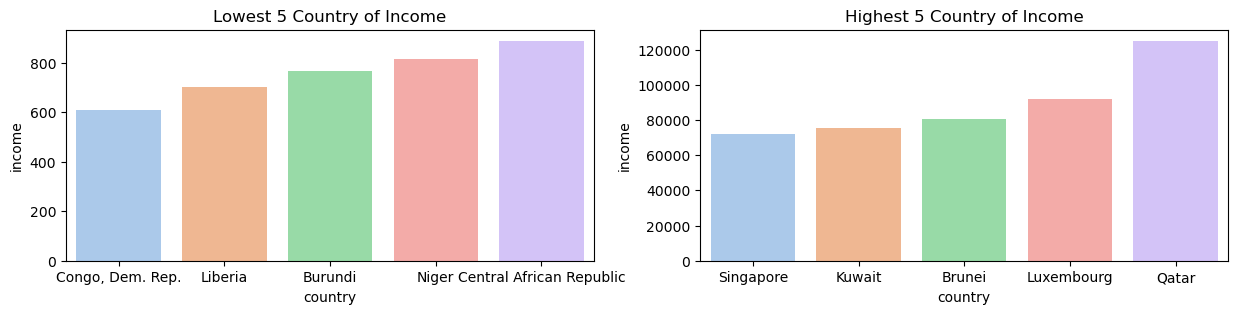

In [1319]:
sorted = data.sort_values(by = "income")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
lowest = sns.barplot(ax = ax[0,0], x = "country", y = "income", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Income")
sns.barplot(ax = ax[0,1], x = "country", y = "income", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Income")
# plt.xticks(rotation = 75)

plt.show()

Inflation : The measurement of the annual growth rate of the Total GDP

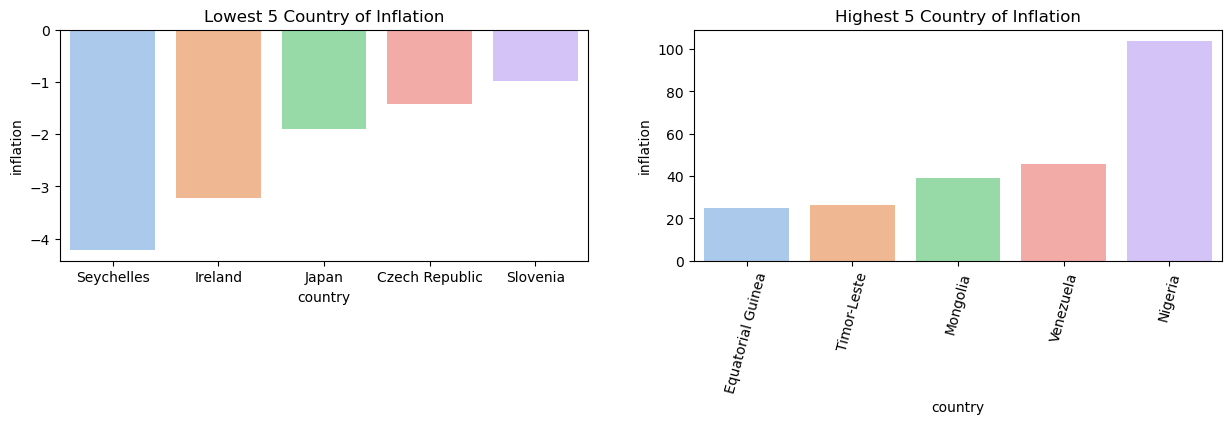

In [1320]:
sorted = data.sort_values(by = "inflation")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
lowest = sns.barplot(ax = ax[0,0], x = "country", y = "inflation", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Inflation")
sns.barplot(ax = ax[0,1], x = "country", y = "inflation", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Inflation")
plt.xticks(rotation = 75)

plt.show()

life expectancy : The average number of years a new born child would live

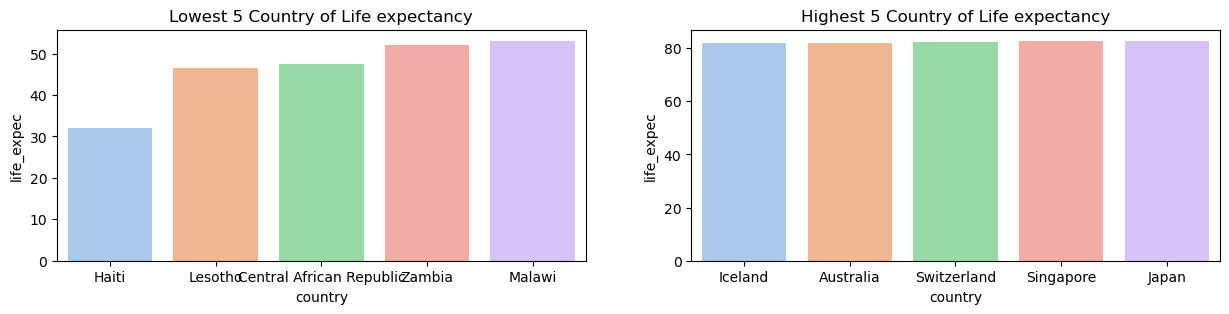

In [1321]:
sorted = data.sort_values(by = "life_expec")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
sns.barplot(ax = ax[0,0], x = "country", y = "life_expec", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Life expectancy")
sns.barplot(ax = ax[0,1], x = "country", y = "life_expec", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Life expectancy")


plt.show()

Total fertility : The number of children that would be born to each woman

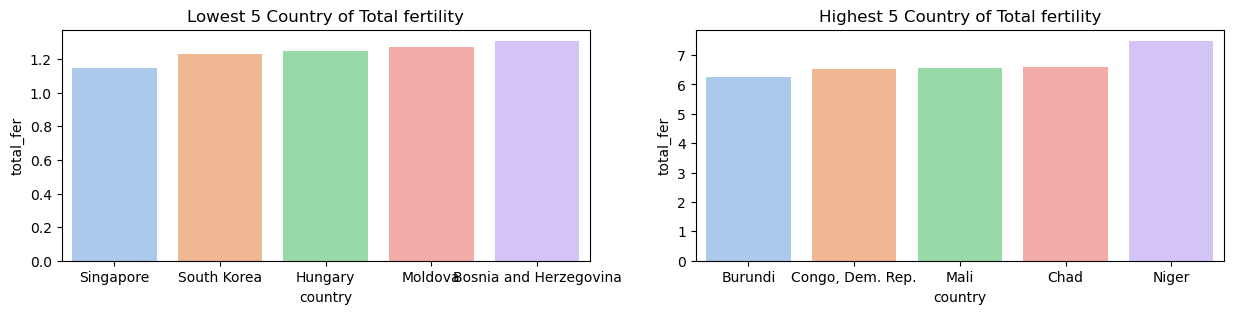

In [1322]:
sorted = data.sort_values(by = "total_fer")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
sns.barplot(ax = ax[0,0], x = "country", y = "total_fer", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of Total fertility")
sns.barplot(ax = ax[0,1], x = "country", y = "total_fer", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of Total fertility")

plt.show()

GDPP : The GDP per capita

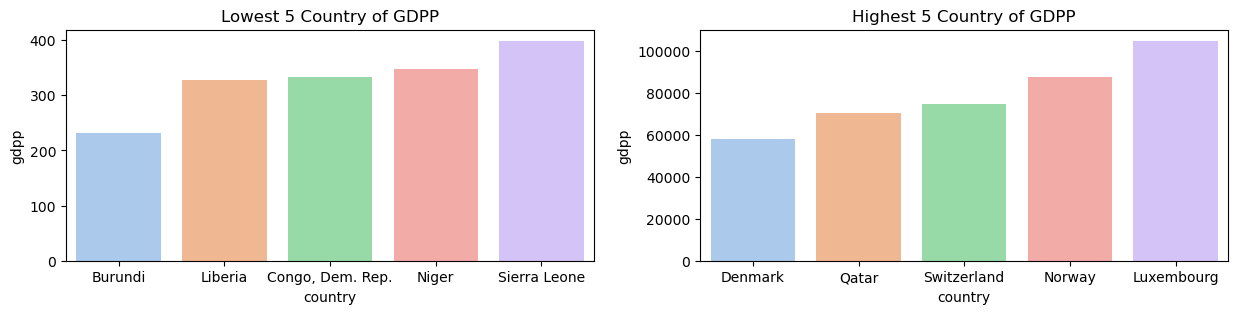

In [1323]:
sorted = data.sort_values(by = "gdpp")

fig, ax = plt.subplots(1, 2, squeeze = False, figsize=(15, 3))
sns.barplot(ax = ax[0,0], x = "country", y = "gdpp", data = sorted.iloc[:5]).set(title = "Lowest 5 Country of GDPP")
sns.barplot(ax = ax[0,1], x = "country", y = "gdpp", data = sorted.iloc[-5:]).set(title = "Highest 5 Country of GDPP")

plt.show()

### K-means Clustering

Fitting scaler

In [1324]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])
scaled_data = pd.DataFrame(scaled_data, columns = ["child_mort", "exports", "health", "imports", "income", "inflation","life_expec", "total_fer", "gdpp"])
scaled_data = data[["country"]].join(scaled_data)

K-means Clustering with the whole data

In [1325]:
k_data_all = scaled_data.iloc[:, 1:]
k_data_all.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [1326]:
kmeans = KMeans(n_clusters = 3, n_init = 20, random_state = 5)
kmeans.fit(k_data_all)

data["cluster_all"] = kmeans.labels_
data["cluster_all"].value_counts()

1    84
0    47
2    36
Name: cluster_all, dtype: int64

k-means clustering with health data

In [1327]:
k_data_health = scaled_data[["child_mort", "life_expec", "total_fer"]]

kmeans = KMeans(n_clusters = 3, n_init = 20, random_state = 5)
kmeans.fit(k_data_health)

data["cluster_health"] = kmeans.labels_
data["cluster_health"].value_counts()

1    97
0    42
2    28
Name: cluster_health, dtype: int64

k-means clustering with economic data

In [1328]:
k_data_economic = scaled_data[["income", "gdpp"]]

kmeans = KMeans(n_clusters = 3, n_init = 20, random_state = 5)
kmeans.fit(k_data_economic)

data["cluster_economic"] = kmeans.labels_
data["cluster_economic"].value_counts()

0    128
2     32
1      7
Name: cluster_economic, dtype: int64

### Check how clusters are made

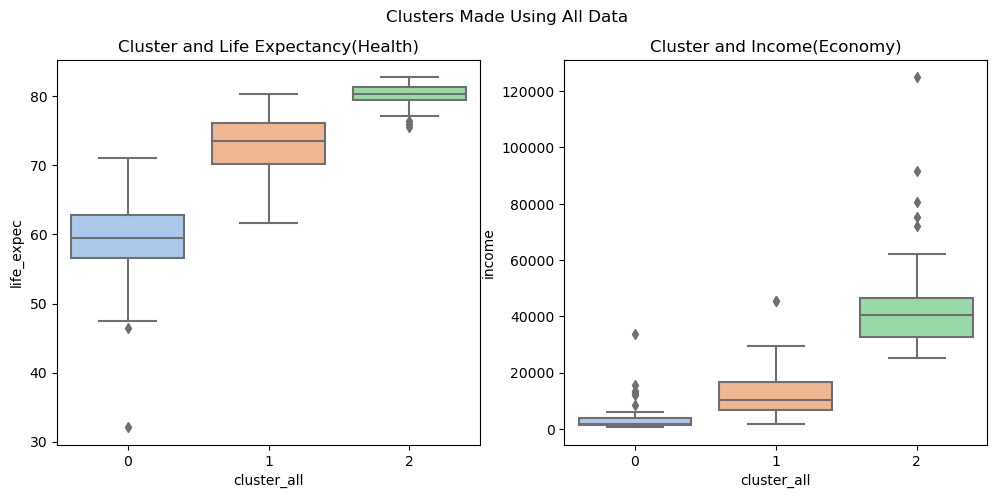

In [1329]:
fig, ax = plt.subplots(1, 2, squeeze = False, figsize = (12, 5))
sns.boxplot(ax = ax[0,0], x = "cluster_all", y = "life_expec", data = data).set(title = "Cluster and Life Expectancy(Health)")
sns.boxplot(ax = ax[0,1], x = "cluster_all", y = "income", data = data).set(title = "Cluster and Income(Economy)")
plt.suptitle("Clusters Made Using All Data")
plt.show()



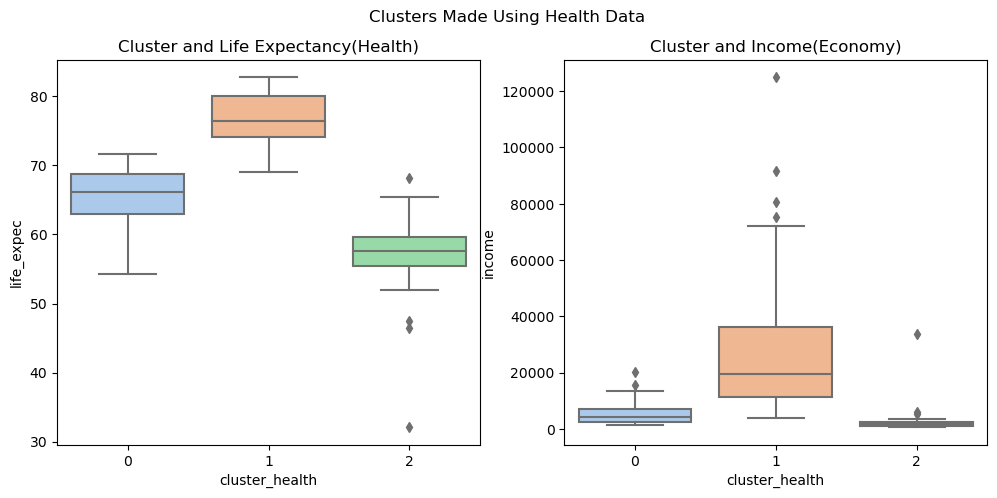

In [1330]:
fig, ax = plt.subplots(1, 2, squeeze = False, figsize = (12, 5))
sns.boxplot(ax = ax[0,0], x = "cluster_health", y = "life_expec", data = data).set(title = "Cluster and Life Expectancy(Health)")
sns.boxplot(ax = ax[0,1], x = "cluster_health", y = "income", data = data).set(title = "Cluster and Income(Economy)")
plt.suptitle("Clusters Made Using Health Data")
plt.show()

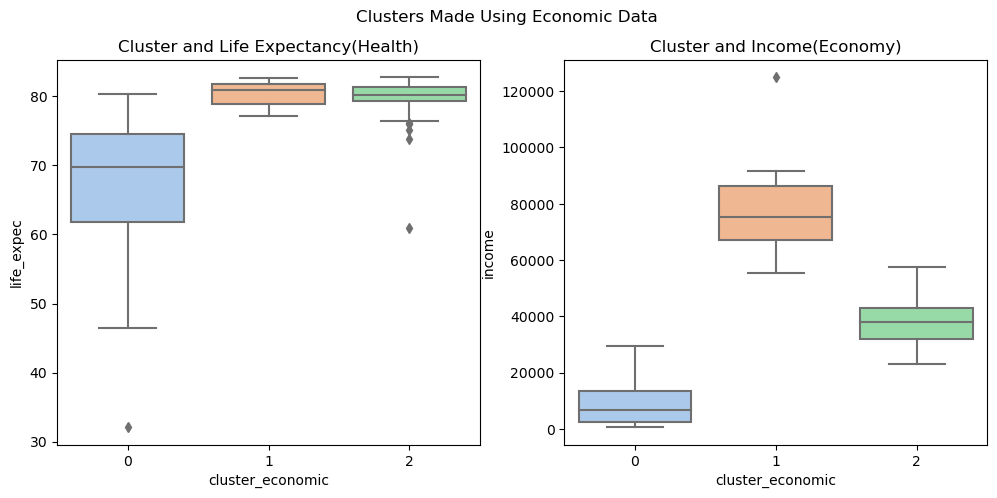

In [1331]:
fig, ax = plt.subplots(1, 2, squeeze = False, figsize = (12, 5))
sns.boxplot(ax = ax[0,0], x = "cluster_economic", y = "life_expec", data = data).set(title = "Cluster and Life Expectancy(Health)")
sns.boxplot(ax = ax[0,1], x = "cluster_economic", y = "income", data = data).set(title = "Cluster and Income(Economy)")
plt.suptitle("Clusters Made Using Economic Data")
plt.show()

In [1332]:
in_need = data.loc[(data["cluster_all"] == 1) & 

SyntaxError: incomplete input (4127971467.py, line 1)